<a href="https://colab.research.google.com/github/ann-e888/Data_Analysis_Python/blob/main/Marathons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings('ignore')

## Data import and cleaning

In [89]:
data = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')
data.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [90]:
print(data.size)
print(data.shape)

96995535
(7461195, 13)


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year of event,7461195.0,2011.983451,10.008437,1798.0,2010.0,2015.0,2018.0,2022.0
Event number of finishers,7461195.0,1451.968732,3124.783669,0.0,88.0,235.0,867.0,20027.0
Athlete year of birth,6873034.0,1969.762074,13.125596,1193.0,1962.0,1971.0,1979.0,2021.0
Athlete ID,7461195.0,553626.129874,480161.284180,0.0,135712.0,394468.0,1037699.0,1641167.0


In [93]:
data.isnull().sum()

,0
Year of event,0
Event dates,0
Event name,0
Event distance/length,1053
Event number of finishers,0
Athlete performance,2
Athlete club,2826524
Athlete country,3
Athlete year of birth,588161
Athlete gender,7


In [94]:
data[(data['Event distance/length'].isin(['100km', '100mi'])) & (data['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538504,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 100mi (TPE),100mi,31,16:48:09 h,日本隊,JPN,1965.0,M,M50,9.578,53107
2538505,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 100mi (TPE),100mi,31,18:25:08 h,NaN,TPE,1964.0,M,M55,8.737,4485
2538506,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 100mi (TPE),100mi,31,19:21:23 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,8.314,63964
2538507,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 100mi (TPE),100mi,31,19:46:34 h,NaN,TPE,1968.0,M,M50,8.138,17434
2538508,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 100mi (TPE),100mi,31,20:17:51 h,日本隊,JPN,1960.0,M,M60,7.929,50665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762490,2020,03.-04.10.2020,Ultra Mirage El Djerid (UMED100) (TUN),100km,86,19:38:22 h,Runnig Club Bizerte,TUN,NaN,F,NaN,5.092,860797
2762491,2020,03.-04.10.2020,Ultra Mirage El Djerid (UMED100) (TUN),100km,86,19:38:28 h,NaN,TUN,1982.0,M,M35,5.091,334637
2762492,2020,03.-04.10.2020,Ultra Mirage El Djerid (UMED100) (TUN),100km,86,19:47:22 h,Great Challenge,TUN,1986.0,F,W23,5.053,791906
2762493,2020,03.-04.10.2020,Ultra Mirage El Djerid (UMED100) (TUN),100km,86,19:50:07 h,Marsa Dream Team -RCM-,TUN,NaN,M,NaN,5.042,860798


In [95]:
data['Event name'].value_counts()

,count
Event name,
Two Oceans Marathon (RSA),263574
Comrades Marathon - Down Run (RSA),224491
Comrades Marathon - Up Run (RSA),221162
100 km Lauf Biel (SUI),100657
Two Oceans Marathon - 50km Split (RSA),84737
...,...
Ultramaratona del Tricolore - Giorno 4 -50km (ITA),1
Qinling Training VK Training - Woman 18 (CHN),1
UMF Winter Edition - 1000 Miles (ITA),1


In [96]:
data[data['Event name'].str.contains('(POL)')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
20173,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek (POL)",100km,167,8:55:24 h,7 Brygada Obrony Wybrz...,POL,1978.0,M,M40,11.207,19370
20174,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek (POL)",100km,167,9:54:24 h,Rmf4Rt OCR,POL,1982.0,M,M35,10.094,19371
20175,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek (POL)",100km,167,10:10:52 h,15 Giżycka Brygada Zme...,POL,1984.0,M,M23,9.822,19372
20176,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek (POL)",100km,167,10:11:48 h,Muay Running Team,POL,1978.0,M,M35,9.807,19373
20177,2018,16.-17.03.2018,"Setka Komandosa, Lubliniec - Kokotek (POL)",100km,167,10:37:23 h,16 BPD,POL,1979.0,M,M35,9.413,19374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7431511,1995,23.-24.06.1995,Sudecka Setka - 100 km Boguszów Gorce (POL),100km,86,23:29:00 h,NaN,POL,NaN,M,NaN,4258.0,1639502
7431512,1995,23.-24.06.1995,Sudecka Setka - 100 km Boguszów Gorce (POL),100km,86,23:44:00 h,NaN,POL,NaN,M,NaN,4213.0,1053822
7431513,1995,23.-24.06.1995,Sudecka Setka - 100 km Boguszów Gorce (POL),100km,86,23:44:00 h,*Boguszów-Gorce,POL,1973.0,M,MU23,4213.0,631835
7431514,1995,23.-24.06.1995,Sudecka Setka - 100 km Boguszów Gorce (POL),100km,86,23:56:00 h,NaN,POL,NaN,M,NaN,4178.0,1053815


In [97]:
#combining the distance, year and host country criteria

china100_2020 = data[(data['Event distance/length'].isin(['100km', '100mi']))
      & (data['Year of event'] == 2020)
      & (data['Event name'].str.contains('(CHN)'))]

In [98]:
china100_2020.head()


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2568103,2020,01.-02.01.2020,Liuzhou 100 km (CHN),100km,68,13:01:57 h,NaN,CHN,1990.0,M,M23,7.673,105404
2568104,2020,01.-02.01.2020,Liuzhou 100 km (CHN),100km,68,13:07:51 h,NaN,CHN,1982.0,M,M35,7.616,198551
2568105,2020,01.-02.01.2020,Liuzhou 100 km (CHN),100km,68,13:19:20 h,NaN,CHN,2000.0,M,MU23,7.506,664932
2568106,2020,01.-02.01.2020,Liuzhou 100 km (CHN),100km,68,13:51:09 h,NaN,CHN,1987.0,M,M23,7.219,815988
2568107,2020,01.-02.01.2020,Liuzhou 100 km (CHN),100km,68,13:56:47 h,NaN,CHN,1972.0,F,W45,7.17,77605


In [99]:
china100_2020.shape

(3504, 13)

In [100]:
#remove country code from event name

china100_2020['Event name'] = china100_2020['Event name'].str.split('(').str.get(0)
china100_2020.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2568103,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:01:57 h,NaN,CHN,1990.0,M,M23,7.673,105404
2568104,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:07:51 h,NaN,CHN,1982.0,M,M35,7.616,198551
2568105,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:19:20 h,NaN,CHN,2000.0,M,MU23,7.506,664932
2568106,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:51:09 h,NaN,CHN,1987.0,M,M23,7.219,815988
2568107,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:56:47 h,NaN,CHN,1972.0,F,W45,7.17,77605


In [101]:
#remove the sex from Athlete age category

china100_2020['Athlete age category'] = china100_2020['Athlete age category'].str.extract('(\d+)$')
china100_2020.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2568103,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:01:57 h,NaN,CHN,1990.0,M,23,7.673,105404
2568104,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:07:51 h,NaN,CHN,1982.0,M,35,7.616,198551
2568105,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:19:20 h,NaN,CHN,2000.0,M,23,7.506,664932
2568106,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:51:09 h,NaN,CHN,1987.0,M,23,7.219,815988
2568107,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:56:47 h,NaN,CHN,1972.0,F,45,7.17,77605


In [102]:
#remove h from Athlete performance

china100_2020['Athlete performance'] = china100_2020['Athlete performance'].str.split(' ').str.get(0)
china100_2020.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2568103,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:01:57,NaN,CHN,1990.0,M,23,7.673,105404
2568104,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:07:51,NaN,CHN,1982.0,M,35,7.616,198551
2568105,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:19:20,NaN,CHN,2000.0,M,23,7.506,664932
2568106,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:51:09,NaN,CHN,1987.0,M,23,7.219,815988
2568107,2020,01.-02.01.2020,Liuzhou 100 km,100km,68,13:56:47,NaN,CHN,1972.0,F,45,7.17,77605


In [103]:
china100_2020.isna().sum()

,0
Year of event,0
Event dates,0
Event name,0
Event distance/length,0
Event number of finishers,0
Athlete performance,0
Athlete club,3504
Athlete country,0
Athlete year of birth,79
Athlete gender,0


In [104]:
#drop Athlete club, as there are only null values
#drop Athlete year of birth, age category is enough
#drop Year of event, unnecessary information repetition

china100_2020.drop(['Athlete club', 'Athlete year of birth', 'Year of event'], axis=1, inplace=True)
china100_2020.head()

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2568103,01.-02.01.2020,Liuzhou 100 km,100km,68,13:01:57,CHN,M,23,7.673,105404
2568104,01.-02.01.2020,Liuzhou 100 km,100km,68,13:07:51,CHN,M,35,7.616,198551
2568105,01.-02.01.2020,Liuzhou 100 km,100km,68,13:19:20,CHN,M,23,7.506,664932
2568106,01.-02.01.2020,Liuzhou 100 km,100km,68,13:51:09,CHN,M,23,7.219,815988
2568107,01.-02.01.2020,Liuzhou 100 km,100km,68,13:56:47,CHN,F,45,7.17,77605


In [105]:
china100_2020[china100_2020['Athlete age category'].isna() == 1]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2581497,26.-27.06.2020,Lianyungang Shanhai 100 Cross-Country,100km,71,17:51:51,CHN,M,NaN,5.598,819014
2636364,29.-30.09.2020,The Yellow River Stone Forest Ultra Run,100km,77,10:19:16,CHN,M,NaN,9.689,830453
2636365,29.-30.09.2020,The Yellow River Stone Forest Ultra Run,100km,77,10:28:54,CHN,M,NaN,9.54,784189
2636372,29.-30.09.2020,The Yellow River Stone Forest Ultra Run,100km,77,10:55:14,CHN,M,NaN,9.157,830455
2636379,29.-30.09.2020,The Yellow River Stone Forest Ultra Run,100km,77,12:20:12,CHN,F,NaN,8.106,830456
...,...,...,...,...,...,...,...,...,...,...
2737859,24.-25.10.2020,Xihong Old Road Ultra Trail - 100 km,100km,89,20:14:46,CHN,F,NaN,4.939,855237
2737868,24.-25.10.2020,Xihong Old Road Ultra Trail - 100 km,100km,89,22:19:53,CHN,F,NaN,4.478,855238
2737877,24.-25.10.2020,Xihong Old Road Ultra Trail - 100 km,100km,89,23:23:37,CHN,F,NaN,4.275,855240
2737879,24.-25.10.2020,Xihong Old Road Ultra Trail - 100 km,100km,89,23:24:03,CHN,M,NaN,4.273,855241


In [106]:
#drop null values

china100_2020.dropna(inplace=True)
china100_2020.shape

(3425, 10)

In [107]:
china100_2020[china100_2020.duplicated() == True]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID


In [108]:
china100_2020.reset_index(drop=True, inplace=True)
china100_2020

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,01.-02.01.2020,Liuzhou 100 km,100km,68,13:01:57,CHN,M,23,7.673,105404
1,01.-02.01.2020,Liuzhou 100 km,100km,68,13:07:51,CHN,M,35,7.616,198551
2,01.-02.01.2020,Liuzhou 100 km,100km,68,13:19:20,CHN,M,23,7.506,664932
3,01.-02.01.2020,Liuzhou 100 km,100km,68,13:51:09,CHN,M,23,7.219,815988
4,01.-02.01.2020,Liuzhou 100 km,100km,68,13:56:47,CHN,F,45,7.17,77605
...,...,...,...,...,...,...,...,...,...,...
3420,04.-05.10.2020,Jinhua Beishan Peak - 100 km,100km,23,23:27:55,CHN,M,35,4.262,92852
3421,04.-05.10.2020,Jinhua Beishan Peak - 100 km,100km,23,23:50:08,CHN,F,45,4.195,763036
3422,04.-05.10.2020,Jinhua Beishan Peak - 100 km,100km,23,23:50:15,CHN,M,45,4.195,29719
3423,04.-05.10.2020,Jinhua Beishan Peak - 100 km,100km,23,23:50:24,CHN,F,45,4.195,763040


In [109]:
china100_2020.dtypes

,0
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete country,object
Athlete gender,object
Athlete age category,object
Athlete average speed,object
Athlete ID,int64


In [110]:
#type change

china100_2020['Athlete age category'] = china100_2020['Athlete age category'].astype('int64')
china100_2020['Athlete average speed'] = china100_2020['Athlete average speed'].astype('float64')

In [111]:
#rename columns

china100_2020.columns = china100_2020.columns.str.lower().str.replace(' ', '_')
china100_2020.head()

,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id
0,01.-02.01.2020,Liuzhou 100 km,100km,68,13:01:57,CHN,M,23,7.673,105404
1,01.-02.01.2020,Liuzhou 100 km,100km,68,13:07:51,CHN,M,35,7.616,198551
2,01.-02.01.2020,Liuzhou 100 km,100km,68,13:19:20,CHN,M,23,7.506,664932
3,01.-02.01.2020,Liuzhou 100 km,100km,68,13:51:09,CHN,M,23,7.219,815988
4,01.-02.01.2020,Liuzhou 100 km,100km,68,13:56:47,CHN,F,45,7.170,77605


## Visualizations

In [112]:
china100_2020.columns

Index(['event_dates', 'event_name', 'event_distance/length',
       'event_number_of_finishers', 'athlete_performance', 'athlete_country',
       'athlete_gender', 'athlete_age_category', 'athlete_average_speed',
       'athlete_id'],
      dtype='object')

<Axes: xlabel='event_distance/length', ylabel='Count'>

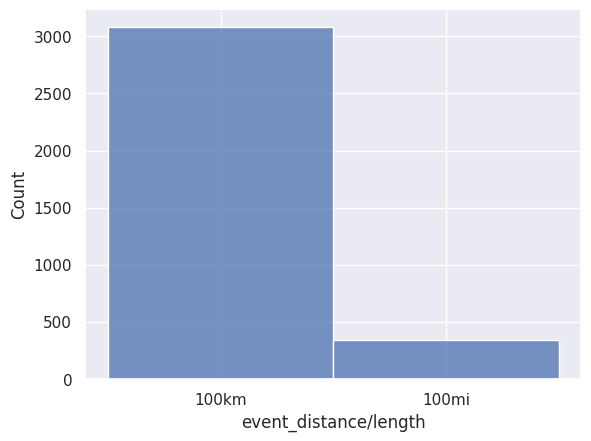

In [113]:
sns.histplot(china100_2020['event_distance/length'])

<Axes: xlabel='event_distance/length', ylabel='Count'>

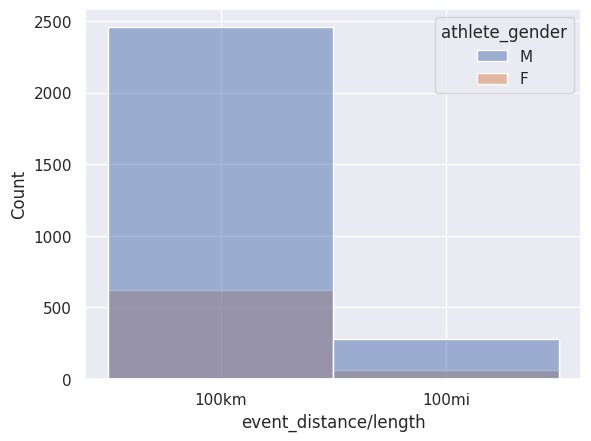

In [114]:
sns.histplot(china100_2020,
             x='event_distance/length',
             hue='athlete_gender')

<Axes: xlabel='athlete_average_speed', ylabel='Count'>

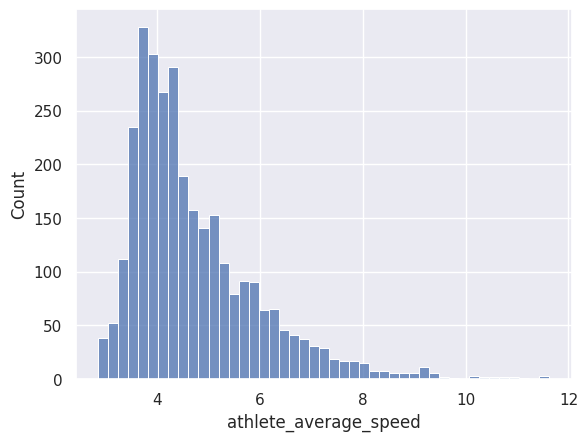

In [115]:
sns.histplot(china100_2020[china100_2020['event_distance/length'] == '100km']['athlete_average_speed'])

<Axes: xlabel='event_distance/length', ylabel='athlete_average_speed'>

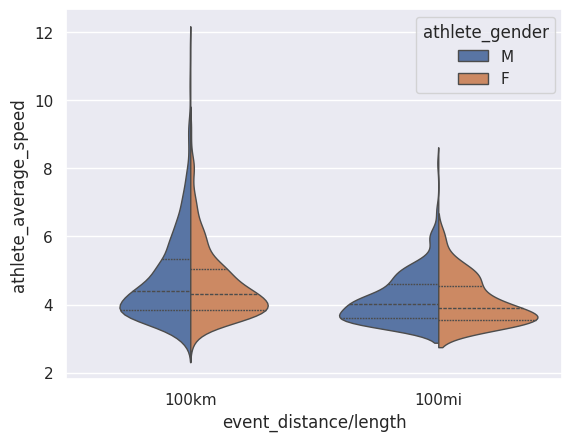

In [116]:
sns.violinplot(china100_2020, x='event_distance/length',
               y='athlete_average_speed',
               hue='athlete_gender',
               split=True,
               inner='quart',
               linewidth=1)

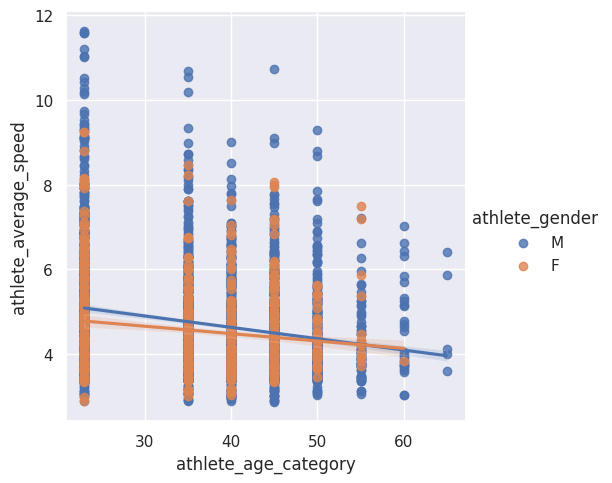

In [117]:
sns.lmplot(china100_2020,
           x='athlete_age_category',
           y='athlete_average_speed',
           hue='athlete_gender')

In [118]:
#difference in speed (by distance and sex)

china100_2020.groupby(['event_distance/length', 'athlete_gender'])['athlete_average_speed'].mean()

event_distance/length  athlete_gender
100km                  F                 4.605061
                       M                 4.763483
100mi                  F                 4.099812
                       M                 4.192853
Name: athlete_average_speed, dtype: float64

In [119]:
#find the best age group

china100_2020.query('`event_distance/length` == "100km"').groupby('athlete_age_category')['athlete_average_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).query('count>19')

,mean,count
athlete_age_category,,
23,5.170444,824
35,4.693998,643
60,4.689808,26
45,4.561797,567
40,4.515880,640
50,4.495793,295
55,4.324602,83


In [120]:
#season change

china100_2020['event_dates'] = china100_2020['event_dates'].str.split('-').str.get(1)

In [121]:
china100_2020.head(

)

,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id
0,02.01.2020,Liuzhou 100 km,100km,68,13:01:57,CHN,M,23,7.673,105404
1,02.01.2020,Liuzhou 100 km,100km,68,13:07:51,CHN,M,35,7.616,198551
2,02.01.2020,Liuzhou 100 km,100km,68,13:19:20,CHN,M,23,7.506,664932
3,02.01.2020,Liuzhou 100 km,100km,68,13:51:09,CHN,M,23,7.219,815988
4,02.01.2020,Liuzhou 100 km,100km,68,13:56:47,CHN,F,45,7.170,77605


In [122]:
china100_2020['event_dates'] = pd.to_datetime(china100_2020['event_dates'], format='%d.%m.%Y')

In [123]:
china100_2020['event_season'] = china100_2020['event_dates'].apply(lambda x:
                                                                   'Winter' if x.month > 11 else
                                                                   'Fall' if x.month > 8 else
                                                                   'Summer' if x.month > 5 else
                                                                   'Spring' if x.month > 2 else
                                                                   'Winter')

In [125]:
china100_2020.groupby('event_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
event_season,,
Winter,5.110982,1007
Fall,4.505058,1791
Summer,4.464742,627
